# Imported all the necesary data for analysis
### Saved a table from a database with data from The Numbers as a Pandas DataFrame

In [85]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import json
import sqlite3
import numpy as np
%matplotlib inline
from PIL import Image
import seaborn as sns
from collections import Counter

thenums_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


# Created a function that turned object columns into integer colums

### This function was run on the columns of this dataframe


In [86]:
# This function turns series columns into integers
def make_column_integer(df, series):
    df[series] = df[series].str.replace('$', '')
    df[series] = df[series].str.replace(',', '')
    df[series] = df[series].astype(int)

# Turns all the columns in this dataframe into integers
make_column_integer(thenums_df, 'production_budget')
make_column_integer(thenums_df, 'domestic_gross')
make_column_integer(thenums_df, 'worldwide_gross')


## We then made 2 new columns in the dataframe: 

One column called "total_gross", which was the sum of the domestic and worldwide grossings, and another column called "total_profit" that is the total gross minus the production cost.



In [87]:
thenums_df['total_profit'] = (thenums_df['worldwide_gross']-thenums_df['production_budget'])
thenums_df.sort_values('total_profit', ascending = False, inplace=True)

# A new dataframe from the IMDB database was imported that contained the genres of the movies.

## It is commented out because these dataframes are loaded in from files later in the notebook

In [88]:
#imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')



# The 'thenums_df' dataframe and the 'imdb_title_basics' dataframe were merged to compare and contrast more data



In [89]:
#master_movies_df = pd.merge(imdb_title_basics, thenums_df, how='inner', left_on='primary_title', right_on='movie')

In [90]:
# Sorted the values by hightest profit

#master_movies_df = master_movies_df.sort_values('total_profit', ascending=False)

In [91]:
# Drops redundant columns

#master_movies_df = master_movies_df.drop(columns = ['original_title', 'start_year', 'id', 'movie'])

In [92]:
# Drops the duplicated movies from the dataframe

#master_movies_df = master_movies_df.drop_duplicates(subset='primary_title')

In [93]:
#Sets the index to their tconst

#master_movies_df.set_index('tconst', inplace=True)

In [94]:
#Drops all null values from the genres catagory

#master_movies_df.dropna(subset=['genres'], inplace=True)

In [95]:
#master_movies_df.at['tt1775309', 'genres'] = 'Action,Adventure,Fantasy'

# From this DataFrame, we created a function that produced a list of all the genres present

In [96]:
# Puts all the genres for each movie into a list

# list_of_genres = master_movies_df['genres']
# list_of_genres = list_of_genres.str.split(',')

In [97]:
# nunique_genres=[]
# for x in list_of_genres:
#     for genre in x:
#         nunique_genres.append(genre)

# unique_genres = set(nunique_genres)

## This DataFrame was cleaned and seperated into movies with no profit data (streamed movies) and movies with profit data (theater movies)

In [98]:
# stream_movies = master_movies_df.loc[master_movies_df['worldwide_gross']== 0]
# stream_movies = stream_movies.sort_values(by='production_budget', ascending=False)
# stream_movies = stream_movies.drop(['domestic_gross','worldwide_gross','total_profit'], axis='columns')

In [99]:
# theater_movies = master_movies_df[master_movies_df.worldwide_gross != 0]

## These DataFrames were turned into CSV files

In [100]:
# theater_movies.to_csv('all_theater_movies.csv')
# stream_movies.to_csv('all_streamed_movies.csv')

In [101]:
theater_movies = pd.read_csv("./all_theater_movies.csv")

# The theater movies dataframe was broken into sub-dataframes, for each genre we are analyzing.

In [102]:
action_movies= theater_movies[theater_movies.genres.str.contains('Action' or 'Adventure')]
drama_movies= theater_movies[theater_movies.genres.str.contains('Drama')]
comedy_movies= theater_movies[theater_movies.genres.str.contains('Comedy')]
horror_movies= theater_movies[theater_movies.genres.str.contains('Horror')]

## This Function turns the DataFrames into CSV files, and was applied to each genre

In [103]:
def make_csv(data, file_name):
    filename = data.to_csv(file_name)
    return filename

In [104]:
make_csv(action_movies, 'all_action_movies.csv')
make_csv(comedy_movies, 'all_comedy_movies.csv')
make_csv(drama_movies, 'all_drama_movies.csv')
make_csv(horror_movies, 'all_horror_movies.csv')

  
# A function that creates a new dataframe for each genre (where the profits for each movie are over $1,000,000)
## These new DataFrames are used for more analysis

In [105]:
def get_successful(df):
    df_successes = df.loc[df['total_profit'] > 1000000]
    return df_successes

In [106]:
successful_action = get_successful(action_movies)

In [107]:
successful_comedy = get_successful(comedy_movies)

In [108]:
successful_drama = get_successful(drama_movies)

In [109]:
successful_horror = get_successful(horror_movies)

In [110]:
make_csv(successful_action, 'successful_action.csv')
make_csv(successful_comedy, 'successful_comedy.csv')
make_csv(successful_drama, 'successful_drama.csv')
make_csv(successful_horror, 'successful_horror.csv')

# This function web scrapes the taglines from IMDb for each movie.
## It then organizes the first five taglines into a list for each movie.
#### This line of code is not neccesary to run. The tags are saved as text files that are read later.

In [111]:
# def get_tags(data):
#     no_table = []
#     list_of_tags = []
#     for tconst in data.index:
#         url = f'https://www.imdb.com/title/{tconst}/keywords?ref_=tt_stry_kw'
#         response = requests.get(url)
#         soup = BeautifulSoup(response.text, 'lxml')
        
#         try:
#             table = soup.find_all('table', {'class': 'dataTable'})[0]
#             a_tags = [x.find('a') for x in table.find_all('td', {'class': 'soda sodavote'})]
#             if len([x.text for x in a_tags]) > 5:
#                 text = [x.text for x in a_tags][:5]
#             else:
#                 text = [x.text for x in a_tags]
        
#             list_of_tags.append(text)
        
#         except:
#             no_table.append(tconst)
#             list_of_tags.append([None])
  
#     return list_of_tags

### The function was run on the 4 dataframes

In [112]:
# horror_tags = get_tags(horror_movies)

In [113]:
# action_tags = get_tags(action_movies)

In [114]:
# comedy_tags = get_tags(comedy_movies)

In [115]:
# drama_tags = get_tags(drama_movies)

In [116]:
# horror_movies['tags'] = horror_tags
# comedy_movies['tags'] = comedy_tags
# action_movies['tags'] = action_tags
# drama_movies['tags'] = drama_tags

### This is where each genre tag list was saved as text files

In [117]:
# file = open('horror_tags.txt', 'w')
# file.write(horror_tt)
# file.close()

# file = open('drama_tags.txt', 'w')
# file.write(drama_tt)
# file.close()

# file = open('comedy_tags.txt', 'w')
# file.write(comedy_tt)
# file.close()

# file = open('action_tags.txt', 'w')
# file.write(action_tt)
# file.close()

# This Function removes the null values from the tag lists for each genre, and makes it into one list of all the tags

In [118]:
# def removenulls(tag_list):
#     for x in tag_list:
#         if None in x:
#             tag_list.remove(x)
#     return tag_list

In [119]:
# horror_tags_nonull = removenulls(horror_tags)
# comedy_tags_nonull = removenulls(comedy_tags)
# action_tags_nonull = removenulls(action_tags)
# drama_tags_nonull = removenulls(drama_tags)

### Lists all tags in one list

In [120]:
# def list_all_tags(tag_list):
#     all_tags = []
#     for tags in tag_list:
#         for tag in tags:
#                 all_tags.append(tag)
#     return all_tags

# Those lists were transformed into strings for the Word Cloud

In [121]:
# all_horror_tags = list_all_tags(horror_tags_nonull)
# all_drama_tags = list_all_tags(drama_tags_nonull)
# all_comedy_tags = list_all_tags(comedy_tags_nonull)
# all_action_tags = list_all_tags(action_tags_nonull)

In [122]:
# def tt(all_tags):
#     for x in range(len(all_tags)):
#         all_tags[x] = all_tags[x].title()
#         all_tags[x] = all_tags[x].replace(' ','_')
#     return ' '.join(all_tags)
     

In [123]:
# horror_tt = tt(all_horror_tags)
# drama_tt = tt(all_drama_tags)
# comedy_tt = tt(all_comedy_tags)
# action_tt = tt(all_action_tags)

# This reopens the tag files to continue using for the Word Clouds

In [124]:
horror_tt = open('horror_tags.txt', 'r')
drama_tt = open('drama_tags.txt', 'r')
comedy_tt = open('comedy_tags.txt', 'r')
action_tt = open('action_tags.txt', 'r')

action_tt = action_tt.read()
drama_tt = drama_tt.read()
comedy_tt = comedy_tt.read()
horror_tt = horror_tt.read()

action_tt = action_tt.replace('Sequel', '')
comedy_tt = comedy_tt.replace('Sequel', '')

# The World Cloud for each genre's tags

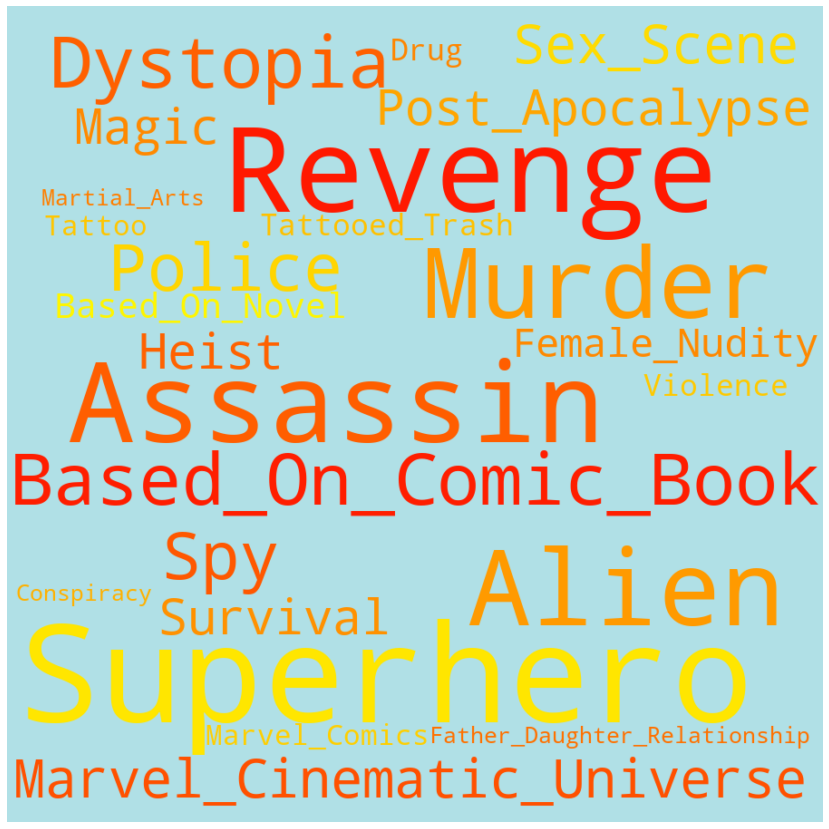

<Figure size 432x288 with 0 Axes>

In [125]:
#create the wordcloud object
plt.figure(figsize=(15,15))
action_wordcloud = WordCloud(width = 900, height = 900, max_words=25, background_color = 'powderblue',
                      collocations=True, colormap = 'autumn', prefer_horizontal = 1, max_font_size = 150).generate(action_tt)

#plot the wordcloud object
plt.imshow(action_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('./images/action_tags_wordcloud.png')

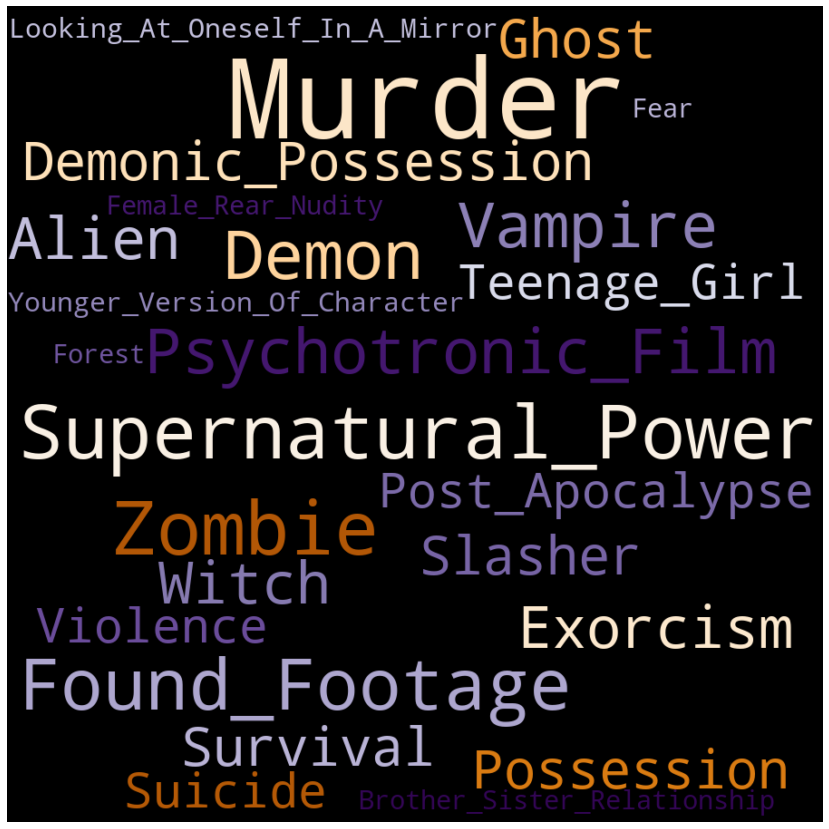

<Figure size 432x288 with 0 Axes>

In [126]:
#create the wordcloud object
plt.figure(figsize=(15,15))
horror_wordcloud = WordCloud(width = 900, height = 900, max_words=25, background_color = 'black',
                      collocations=True, colormap = 'PuOr', prefer_horizontal = 1).generate(horror_tt)

#plot the wordcloud object
plt.imshow(horror_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
plt.savefig('./images/horror_tags_wordcloud.png')

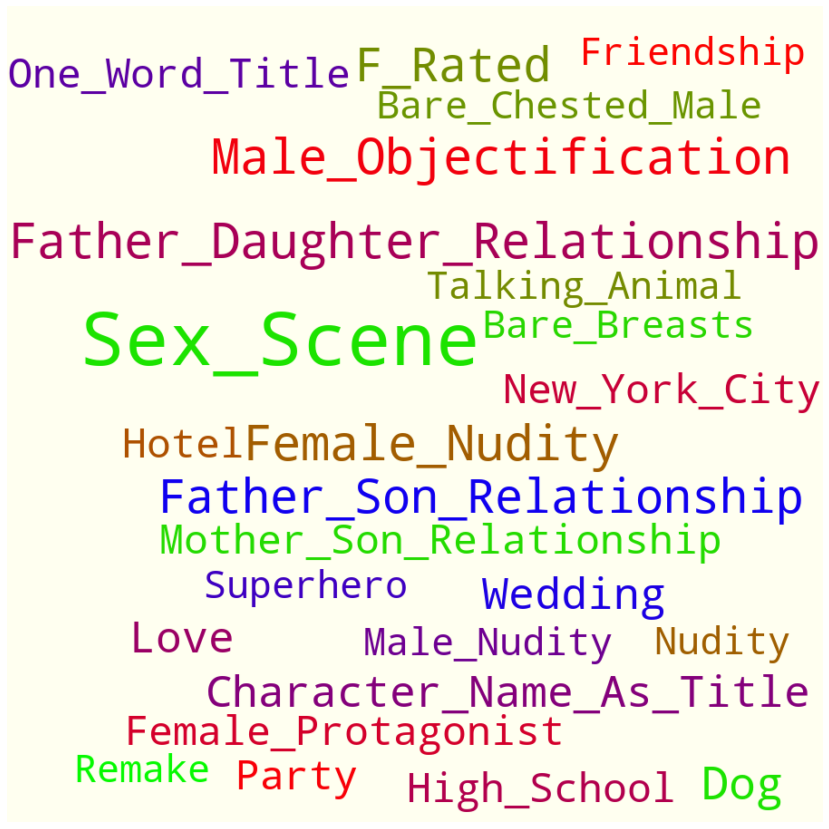

<Figure size 432x288 with 0 Axes>

In [127]:
#create the wordcloud object
plt.figure(figsize=(15,15))
comedy_wordcloud = WordCloud(width = 900, height = 900, max_words=25, background_color = 'ivory',
                      collocations=True, colormap = 'brg', prefer_horizontal = 1 ).generate(comedy_tt)

#plot the wordcloud object
plt.imshow(comedy_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
plt.savefig('./images/comedy_tags_wordcloud.png')

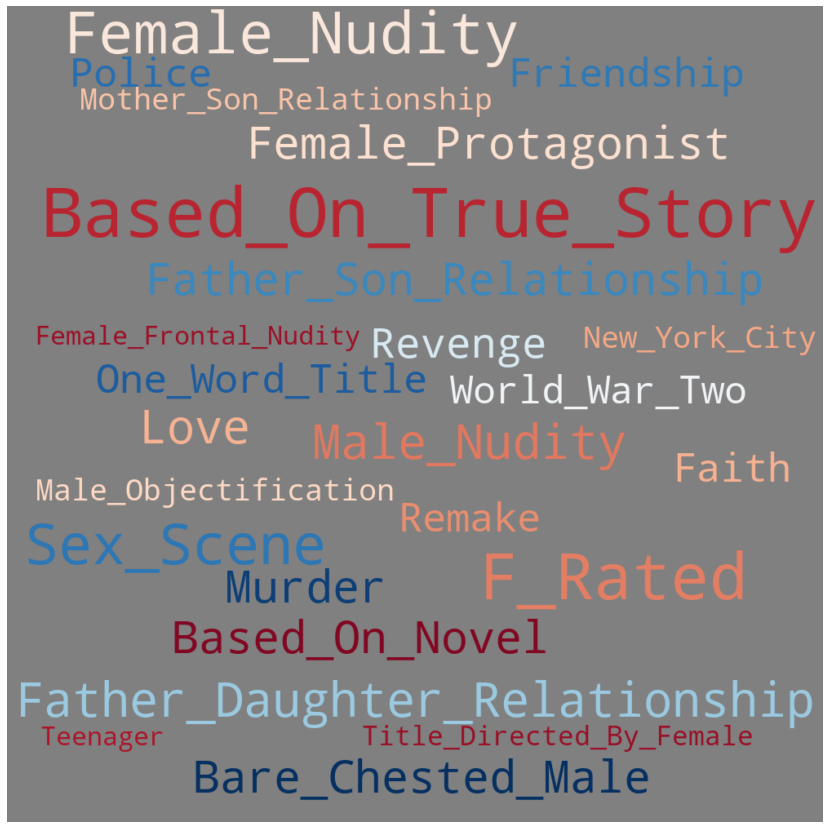

<Figure size 432x288 with 0 Axes>

In [128]:
#create the wordcloud object
plt.figure(figsize=(15,15))
drama_wordcloud = WordCloud(width = 1000, height = 1000, max_words=25, background_color = 'gray',
                      collocations=True, colormap = 'RdBu_r', prefer_horizontal = 1, stopwords = STOPWORDS).generate(drama_tt)

#plot the wordcloud object
plt.imshow(drama_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
plt.savefig('./images/drama_tags_wordcloud.png')

# This code takes the most common title elements and makes them into a word cloud 

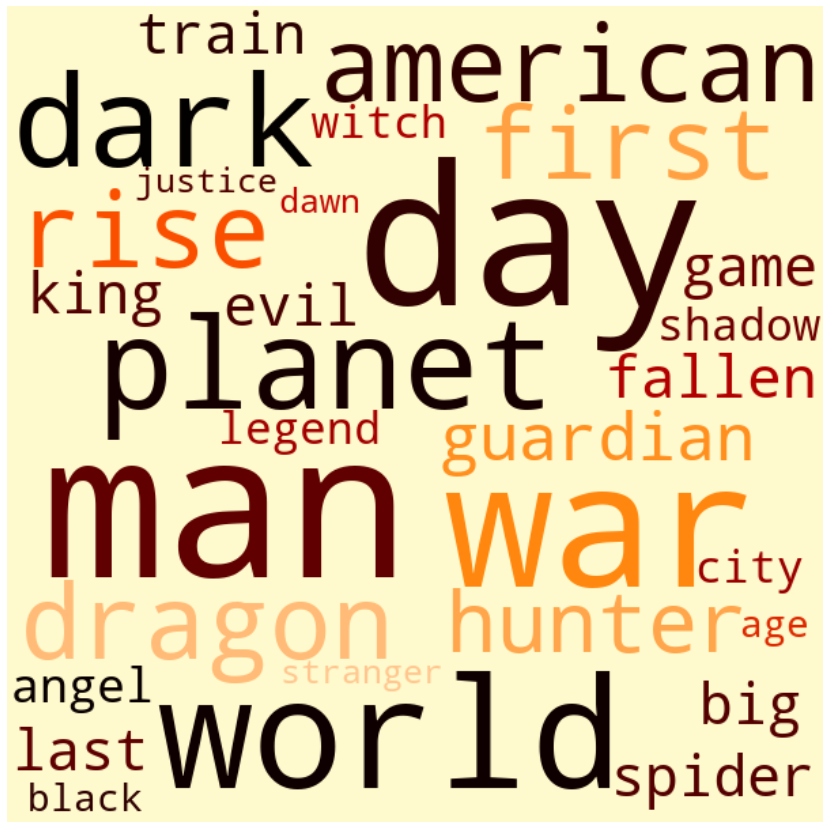

In [129]:
all_movie_words = []
for item in successful_action["primary_title"].str.split():
    for word in item:
        word = word.lower()
        word = word.replace(":", "")
        all_movie_words.append(word)

title_remove = ["the", "of", "3", "2", "lego", "spider", "star", "avenger", "avengers", "transformers", "expendables", "hunger", "games", "iron", "purge", "thor", "x men", "next", "movie", "captain", "x-men", "jurassic", "apes","resident","furious", "america", "knight", "one","story","jack","deadpool","mockingjay","part","pirates","batman","caribbean"]

for item in title_remove:
    for word in all_movie_words:
        if word == item:
            all_movie_words.remove(word)

word_dict = sorted(Counter(all_movie_words).items() , reverse=True,  key=lambda x: x[1])

word_dict = dict(word_dict)

title_word_cloud_str = ""
for item in all_movie_words:
    title_word_cloud_str += item + ","

#create the wordcloud object
plt.figure(figsize=(15,15))
action_title_wordcloud = WordCloud(width = 600, height = 600, max_words=30, background_color = 'lemonchiffon',
                      collocations=True, colormap = 'gist_heat', prefer_horizontal = 1, max_font_size = 150).generate(title_word_cloud_str)

#plot the wordcloud object
plt.imshow(action_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Histograms of runtimes for the successful movies in each genre

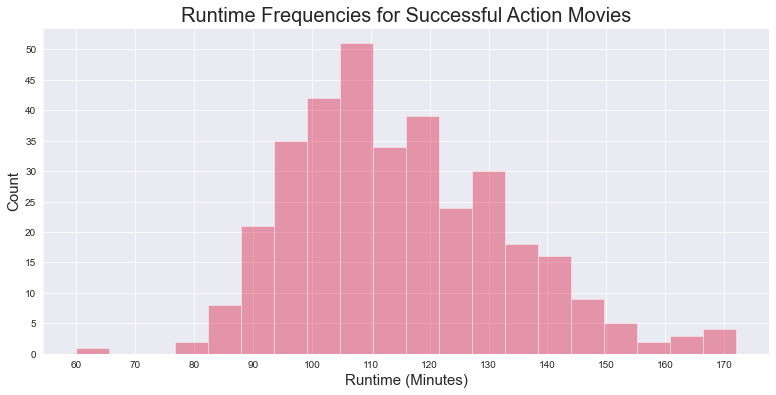

In [130]:
sns.set_style('darkgrid')


actionfighist,actionaxhist = plt.subplots(figsize=(13,6))
sns.distplot(successful_action['runtime_minutes'], kde=False, bins = 20, color='crimson');
actionaxhist.set_xlabel('Runtime (Minutes)', fontsize=15)
actionaxhist.set_ylabel('Count', fontsize=15)
actionaxhist.set_title(f'Runtime Frequencies for Successful Action Movies', fontsize = 20)
plt.locator_params(axis='y', nbins = 15)
plt.locator_params(axis='x', nbins = 20 )
plt.savefig('./images/runtimes_action.png')

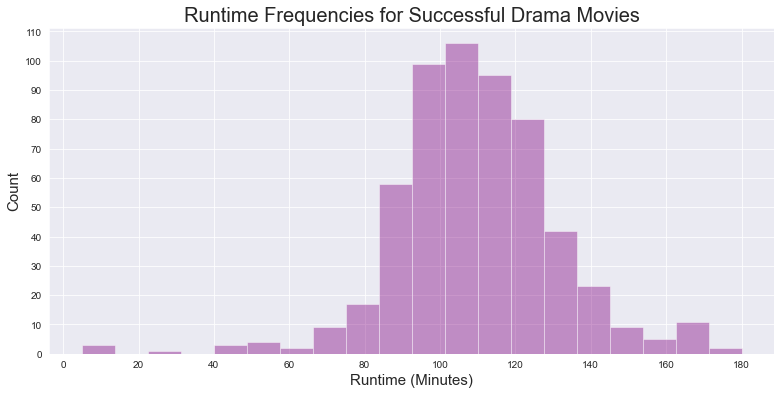

In [131]:
dramafighist,dramaaxhist = plt.subplots(figsize=(13,6))
sns.distplot(successful_drama['runtime_minutes'], kde=False, bins = 20, color='purple');
dramaaxhist.set_xlabel('Runtime (Minutes)', fontsize=15)
dramaaxhist.set_ylabel('Count', fontsize=15)
dramaaxhist.set_title(f'Runtime Frequencies for Successful Drama Movies', fontsize = 20)
plt.locator_params(axis='x', nbins = 15 )
plt.locator_params(axis='y', nbins = 20 )
plt.savefig('./images/runtimes_drama.png')

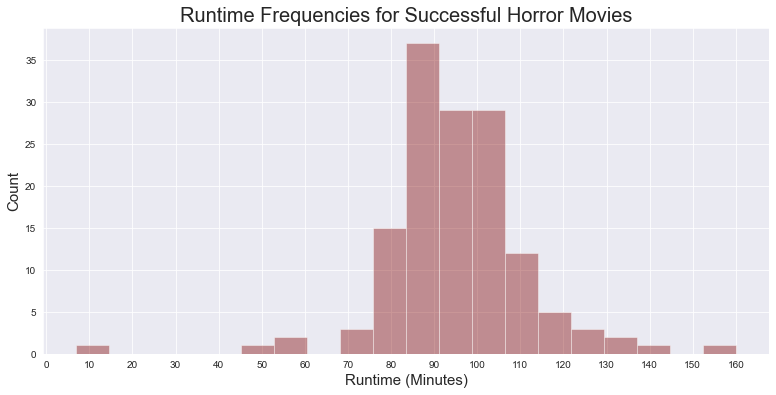

In [132]:
horrorfighist,horroraxhist = plt.subplots(figsize=(13,6))
sns.distplot(successful_horror['runtime_minutes'], kde=False, bins = 20, color='maroon');
horroraxhist.set_xlabel('Runtime (Minutes)', fontsize=15)
horroraxhist.set_ylabel('Count', fontsize=15)
horroraxhist.set_title(f'Runtime Frequencies for Successful Horror Movies', fontsize = 20)
plt.locator_params(axis='y', nbins = 15 )
plt.locator_params(axis='x', nbins = 20)
plt.savefig('./images/runtimes_horror.png')

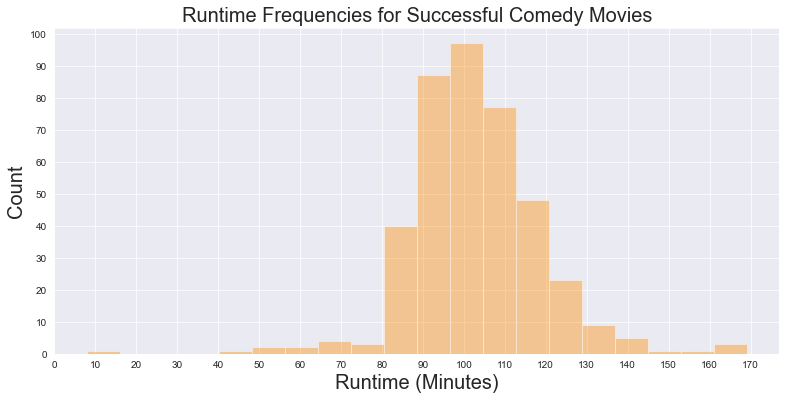

In [133]:
comedyfighist,comedyaxhist = plt.subplots(figsize=(13,6))
sns.distplot(successful_comedy['runtime_minutes'], kde=False, bins = 20, color='darkorange');
comedyaxhist.set_xlabel('Runtime (Minutes)', fontsize=20)
comedyaxhist.set_ylabel('Count', fontsize=20)
comedyaxhist.set_title(f'Runtime Frequencies for Successful Comedy Movies', fontsize = 20)
plt.locator_params(axis='y', nbins = 15)
plt.locator_params(axis='x', nbins = 20 )
plt.savefig('./images/runtimes_comedy.png')

# Comparison of budget and profit

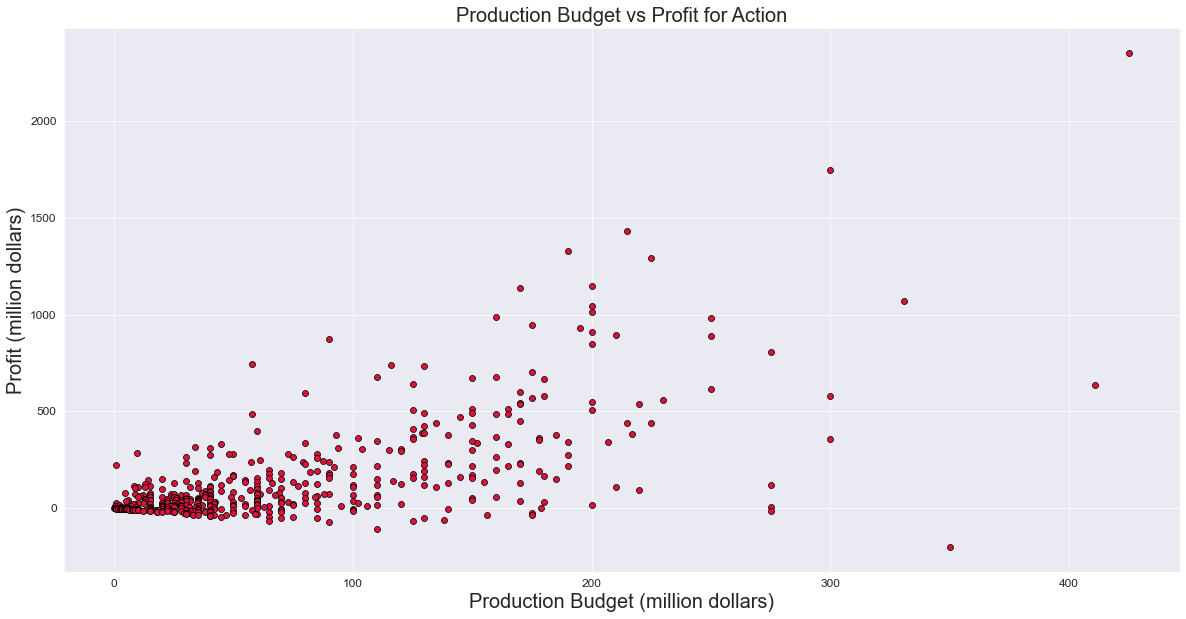

In [134]:
actionfigscat, actionaxscat = plt.subplots(figsize = (20,10))
sns.scatterplot(x = (action_movies['production_budget']/1000000), y = (action_movies['total_profit']/1000000), color='crimson', edgecolor = 'black')
actionaxscat.set_xlabel('Production Budget (million dollars)', fontsize=20)
actionaxscat.set_ylabel('Profit (million dollars)', fontsize=20)
actionaxscat.set_title('Production Budget vs Profit for Action', fontsize = 20)
actionaxscat.tick_params(axis='x', labelsize= 12)
actionaxscat.tick_params(axis='y', labelsize= 12)
plt.savefig('./images/budget_action.png')

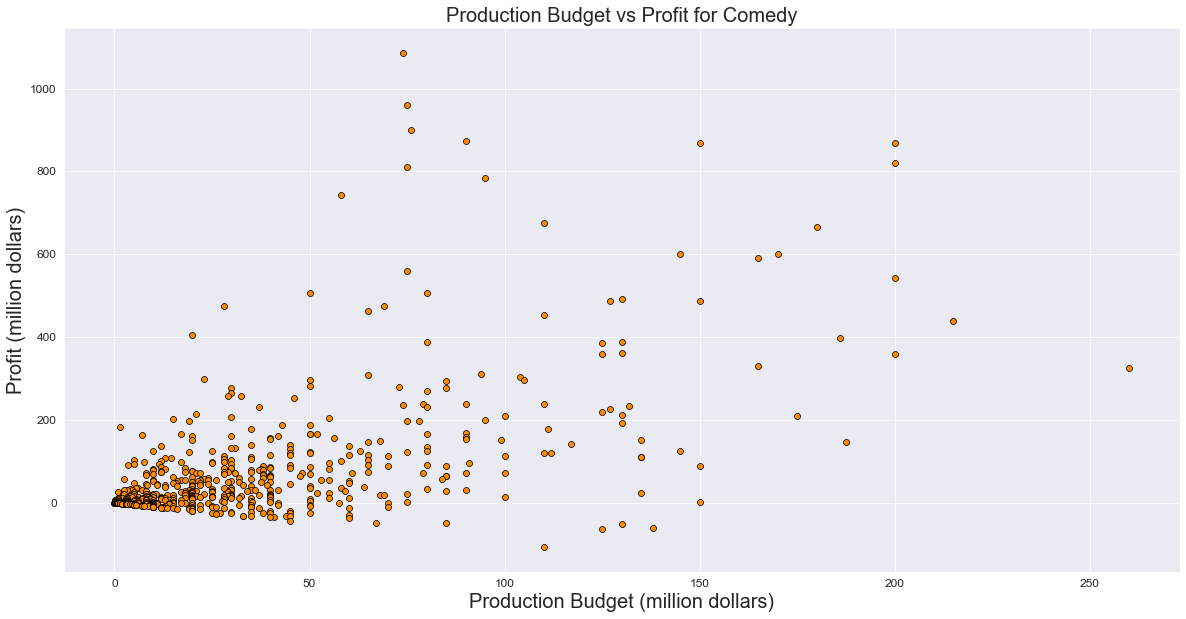

In [135]:
comedyfigscat, comedyaxscat = plt.subplots(figsize = (20,10))
sns.scatterplot(x = (comedy_movies['production_budget']/1000000), y = (comedy_movies['total_profit']/1000000), color='darkorange', edgecolor = 'black')
comedyaxscat.set_xlabel('Production Budget (million dollars)', fontsize=20)
comedyaxscat.set_ylabel('Profit (million dollars)', fontsize=20)
comedyaxscat.set_title('Production Budget vs Profit for Comedy', fontsize = 20)
comedyaxscat.tick_params(axis='x', labelsize= 12)
comedyaxscat.tick_params(axis='y', labelsize= 12)
plt.savefig('./images/budget_comedy.png')

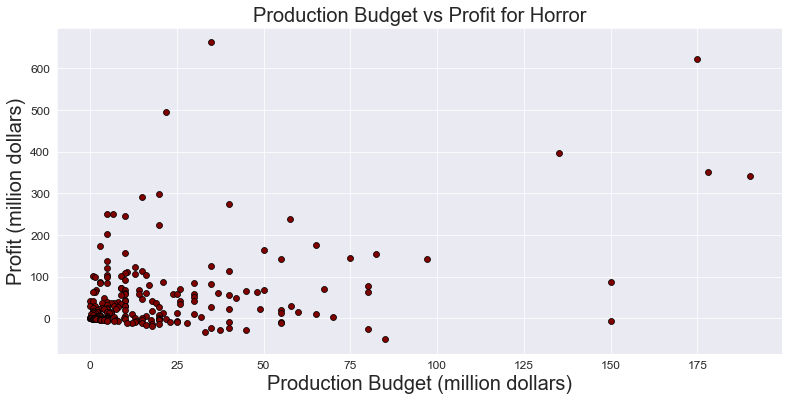

In [136]:
horrorfigscat, horroraxscat = plt.subplots(figsize = (13,6))
sns.scatterplot(x = (horror_movies['production_budget']/1000000), y = (horror_movies['total_profit']/1000000), color='maroon', edgecolor = 'black')
horroraxscat.set_xlabel('Production Budget (million dollars)', fontsize=20)
horroraxscat.set_ylabel('Profit (million dollars)', fontsize=20)
horroraxscat.set_title('Production Budget vs Profit for Horror', fontsize = 20)
horroraxscat.tick_params(axis='x', labelsize= 12)
horroraxscat.tick_params(axis='y', labelsize= 12)
plt.savefig('./images/budget_horror.png')

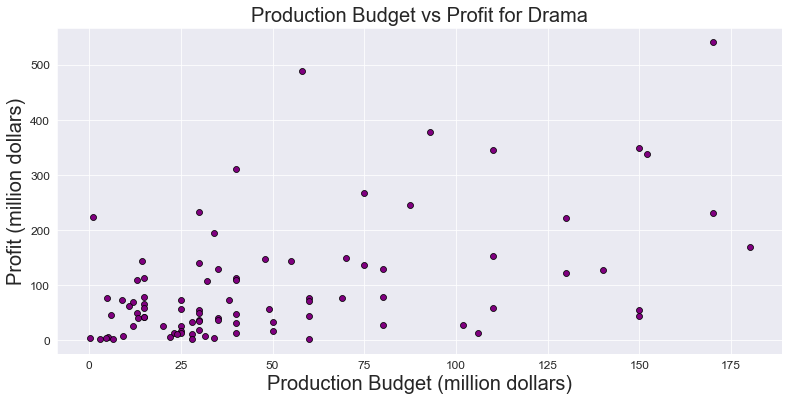

In [137]:
dramafigscat, dramaaxscat = plt.subplots(figsize = (13,6))
sns.scatterplot(x = (successful_drama['production_budget']/1000000), y = (successful_action['total_profit']/1000000), color='purple', edgecolor = 'black')
dramaaxscat.set_xlabel('Production Budget (million dollars)', fontsize=20)
dramaaxscat.set_ylabel('Profit (million dollars)', fontsize=20)
dramaaxscat.set_title('Production Budget vs Profit for Drama', fontsize = 20)
dramaaxscat.tick_params(axis='x', labelsize= 12)
dramaaxscat.tick_params(axis='y', labelsize= 12)
plt.savefig('./images/budget_drama.png')

# Another DataFrame from Rotten Tomatoes was added to each genre's data frame for more analysis
## This new DataFrame included content rating, directors, and actors

In [138]:
tomatoes_data = pd.read_csv('data/ZippedData/rotten_tomatoes_movies.csv.gz')

In [139]:
def add_data(df):
    df_more_data = pd.merge(df, tomatoes_data, how='inner', left_on='primary_title', right_on='movie_title')
    return df_more_data

In [140]:
successful_horror_moredata = add_data(successful_horror)
successful_comedy_moredata = add_data(successful_comedy)
successful_action_moredata = add_data(successful_action)
successful_drama_moredata = add_data(successful_drama)

### Dropped irrelevant columns and rows

In [141]:
def drop_irrelevant_columns(df):
    columns_needed = ['primary_title', 'runtime_minutes', 'genres_x', 'release_date',
                       'production_budget', 'domestic_gross', 'worldwide_gross',
                       'total_profit', 'content_rating', 'directors', 'actors']
    return df[columns_needed]

In [142]:
successful_action_moredata = drop_irrelevant_columns(successful_action_moredata)
successful_comedy_moredata = drop_irrelevant_columns(successful_comedy_moredata)
successful_drama_moredata = drop_irrelevant_columns(successful_drama_moredata)
successful_horror_moredata = drop_irrelevant_columns(successful_horror_moredata)

In [143]:
successful_horror_moredata = successful_horror_moredata.drop(labels=2, axis=0)

In [144]:
make_csv(successful_action_moredata, 'successful_action_moredata.csv')
make_csv(successful_comedy_moredata, 'successful_comedy_moredata.csv')
make_csv(successful_drama_moredata, 'successful_drama_moredata.csv')
make_csv(successful_horror_moredata, 'successful_horror_moredata.csv')

In [145]:
successful_action_moredata = pd.read_csv('./successful_action_moredata.csv')
successful_drama_moredata = pd.read_csv('./successful_drama_moredata.csv')
successful_comedy_moredata = pd.read_csv('./successful_comedy_moredata.csv')
successful_horror_moredata = pd.read_csv('./successful_horror_moredata.csv')

In [146]:
successful_horror_moredata = successful_horror_moredata.drop(0)

In [147]:
successful_drama_moredata = successful_drama_moredata.drop(0)

## This function gets the content rating and the average profit earnings for each genre
### It then displays the results on a bar graph

In [148]:
def get_rating_and_profit(data):
    return data.groupby(['content_rating']).mean()['total_profit']

In [149]:
randp_action = get_rating_and_profit(successful_action_moredata).sort_values()
randp_comedy = get_rating_and_profit(successful_comedy_moredata).sort_values()
randp_drama = get_rating_and_profit(successful_drama_moredata).sort_values()
randp_horror = get_rating_and_profit(successful_horror_moredata).sort_values()

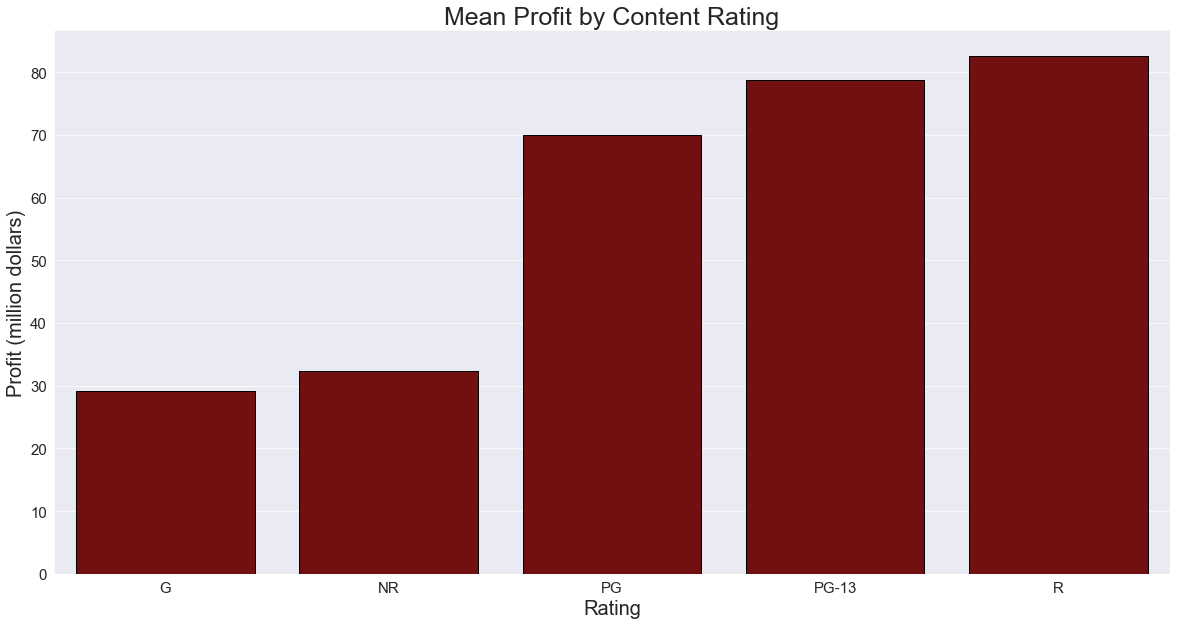

In [150]:
horror_cr_fig, horror_cr_ax = plt.subplots(figsize = (20,10))
sns.barplot(x = randp_horror.index, y = randp_horror/1000000, color = 'maroon', edgecolor='black');
horror_cr_ax.set_xlabel('Rating', fontsize=20)
horror_cr_ax.set_ylabel('Profit (million dollars)', fontsize=20)
horror_cr_ax.set_title(f'Mean Profit by Content Rating', fontsize = 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.savefig('./images/contentrating_horror.png')

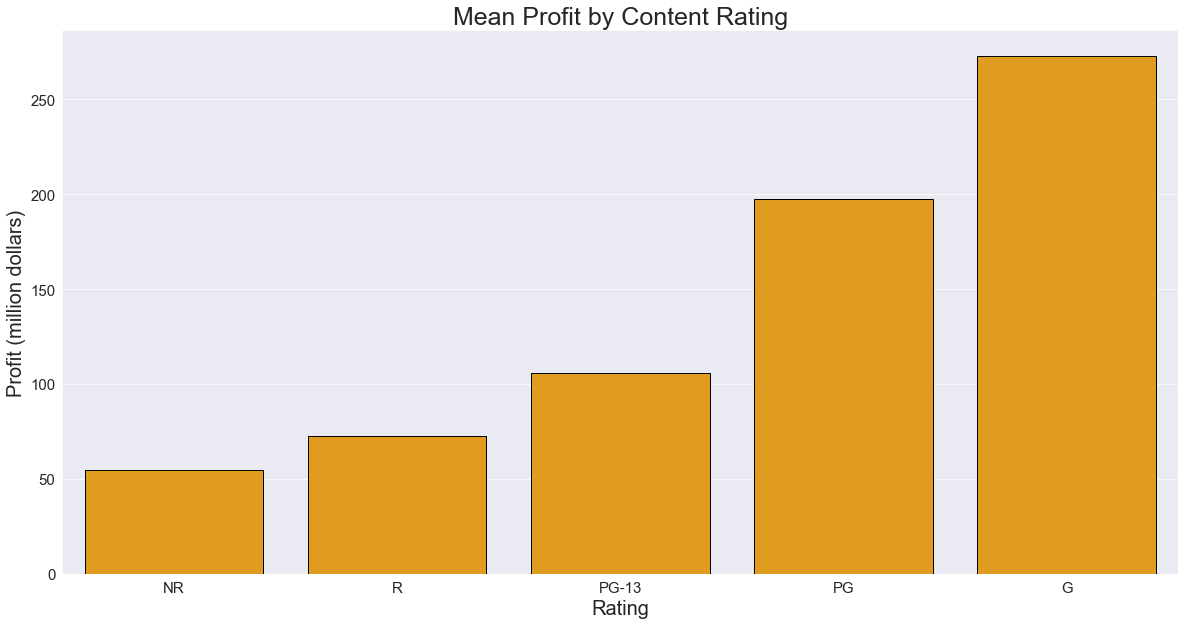

In [151]:
comedy_cr_fig, comedy_cr_ax = plt.subplots(figsize = (20, 10))
sns.barplot(x = randp_comedy.index, y = randp_comedy/1000000, color = 'orange', edgecolor='black');
comedy_cr_ax.set_xlabel('Rating', fontsize=20)
comedy_cr_ax.set_ylabel('Profit (million dollars)', fontsize=20)
comedy_cr_ax.set_title(f'Mean Profit by Content Rating', fontsize = 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.savefig('./images/contentrating_comedy.png')

### This function gets the directors and their profit earnings for each genre

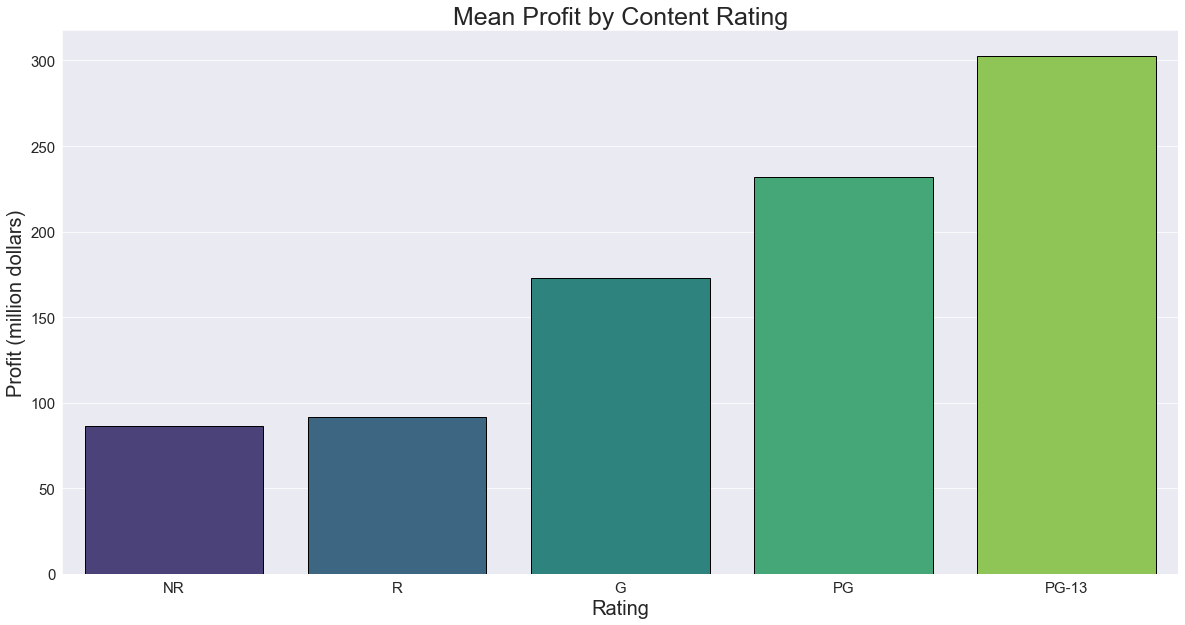

In [152]:
action_cr_fig, action_cr_ax = plt.subplots(figsize = (20,10))
sns.barplot(x = randp_action.index, y = randp_action/1000000, color = 'crimson', edgecolor='black', palette = 'viridis');
action_cr_ax.set_xlabel('Rating', fontsize=20)
action_cr_ax.set_ylabel('Profit (million dollars)', fontsize=20)
action_cr_ax.set_title(f'Mean Profit by Content Rating', fontsize = 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.savefig('./images/contentrating_action.png')

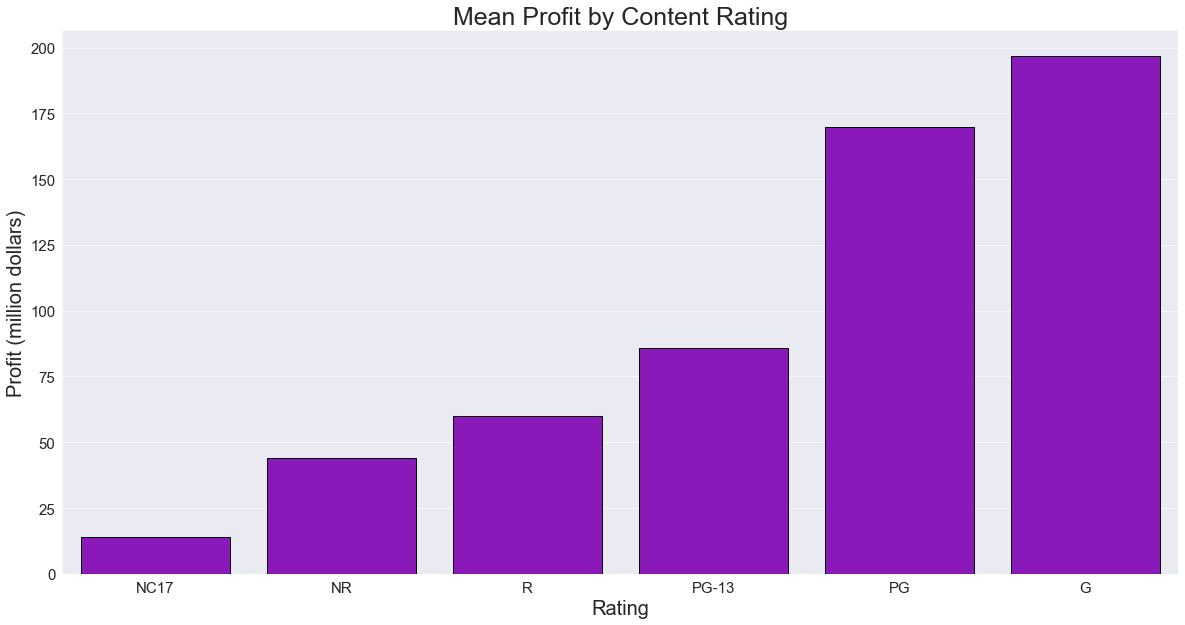

In [153]:
drama_cr_fig, drama_cr_ax = plt.subplots(figsize = (20,10))
sns.barplot(x = randp_drama.index, y = randp_drama/1000000, color = 'darkviolet', edgecolor='black');
drama_cr_ax.set_xlabel('Rating', fontsize=20)
drama_cr_ax.set_ylabel('Profit (million dollars)', fontsize=20)
drama_cr_ax.set_title(f'Mean Profit by Content Rating', fontsize = 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.savefig('./images/contentrating_drama.png')

# These next few lines of code takes the Series of all the actors and formats them for analysis in a bar graph
## Two graphs were created: A bar graph of the most frequent actors in successful action movies, and a bar graph for the average profit of movies featuring a specific actor

In [154]:
for item in successful_action_moredata["actors"]:
    if type(item) == float:
        print(item)

nan


In [155]:
successful_action_moredata.dropna(subset=["actors"],inplace=True)

In [156]:
def get_unique_people(raw_people):
    all_people = []
    clumped_people = raw_people.str.split(",")
    for row in clumped_people:
        if row != None:
            for person in row:
                all_people.append(person)
    unique_people = set(all_people)
    unique_people = [(person.strip()) for person in unique_people]
    unique_people = set(unique_people)
    unique_people = list(unique_people)
    return unique_people

In [157]:
unique_actors = get_unique_people(successful_action_moredata['actors'])
#unique_actors

In [158]:
successful_action_moredata.dropna(subset=["total_profit"], inplace=True)
successful_action_moredata.dropna(subset=["actors"], inplace=True)

In [159]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    #unique is a list of unique values of the unique category
    return_list = []
    occurances_list = []
    label_list = []
    return_dict = {}
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        occurance = len(frame[aggregate_category])
        occurances_list.append(occurance)
        return_list.append(aggregate)
    return_dict = {unique_category: list(unique), aggregate_category: return_list, "occurances": occurances_list}
    df = pd.DataFrame(return_dict)
    df["labels"] = df[unique_category].astype(str) + " (" + df["occurances"].astype(str) + ")"
    df.sort_values(aggregate_category, inplace=True, ascending = False)
    return df

In [160]:
actors_mean_profit = groupby_unformatted_column(successful_action_moredata, unique_actors, "actors", "total_profit")

In [161]:
actors_mean_profit.sort_values("total_profit", ascending=False, inplace=True)
actors_mean_profit = actors_mean_profit[actors_mean_profit["occurances"]>2]

In [162]:
unwanted_actors = ["Ray","King", "Jr.", "Samuel L", "III"]

In [163]:
drop_index = actors_mean_profit[actors_mean_profit["actors"].isin(unwanted_actors)].index

In [164]:
actors_mean_profit.drop(drop_index, axis=0, inplace=True)

In [165]:
actors_occurances = actors_mean_profit.sort_values("occurances", ascending=False)

In [166]:
top_actors_occurances = actors_occurances[0:11]

In [167]:
top_actors_profits = actors_mean_profit[0:11]

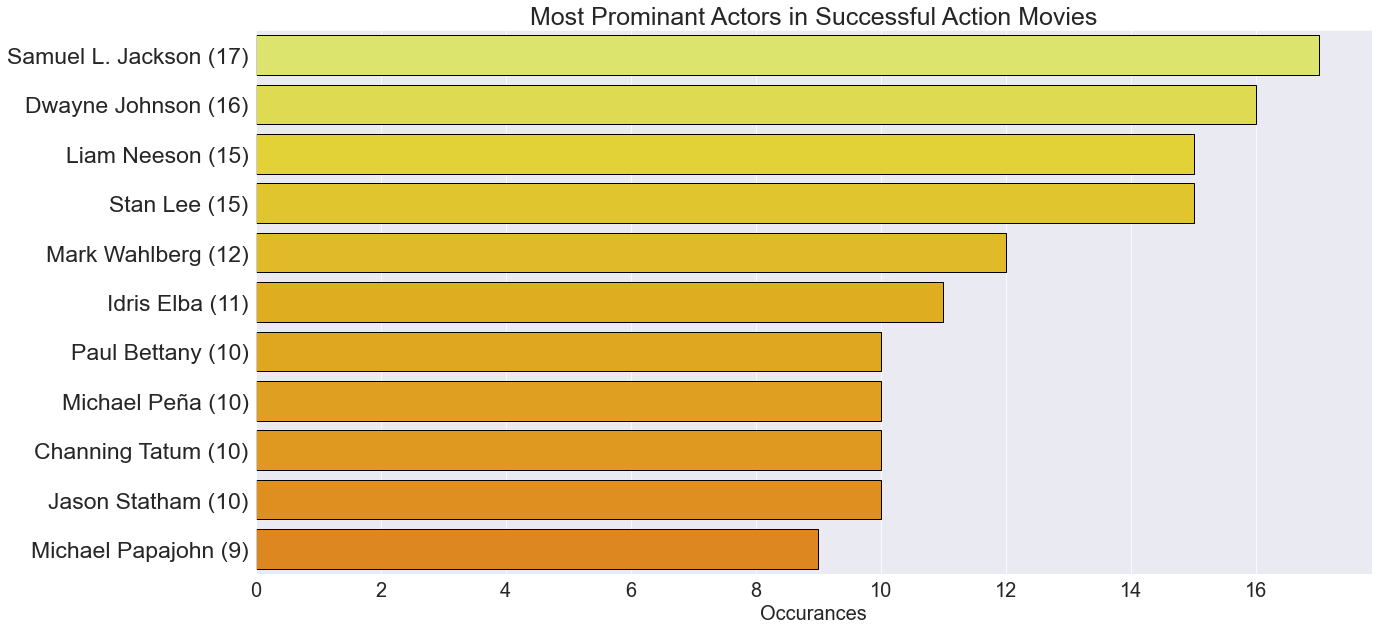

In [168]:
fig, ax = plt.subplots(figsize = (20, 10))
actors_occur = sns.barplot(top_actors_occurances["occurances"], top_actors_occurances["labels"], edgecolor = 'black', palette = 'Wistia')
actors_occur.set(title="Successful Movie Actors");
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 23);
ax.set_xlabel('Occurances', fontsize=20)
ax.set_ylabel('', fontsize=20)
ax.set_title('Most Prominant Actors in Successful Action Movies', fontsize = 25);
plt.savefig('./images/actors_action.png')

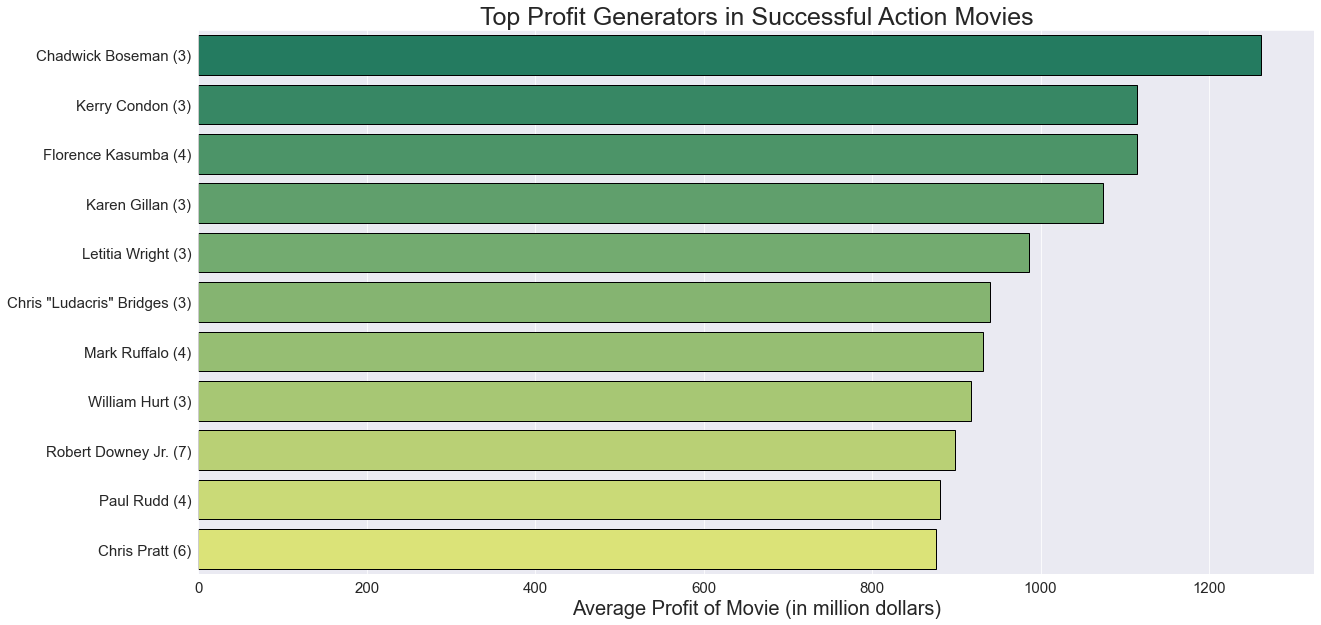

In [169]:
fig, ax = plt.subplots(figsize = (20, 10))
actors_profits = sns.barplot(top_actors_profits["total_profit"]/1000000, top_actors_profits["labels"], edgecolor = 'black', palette = 'summer')
actors_profits.set(title="actors sorted by ammount of times they occur in successful action movies");
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Average Profit of Movie (in million dollars)', fontsize=20);
ax.set_title(f'Top Profit Generators in Successful Action Movies', fontsize = 25);
plt.savefig('./images/profit_actors_action.png')

# We then created a function that finds the most frequent months that successful movies are released in, and the average profit for that month

In [170]:
def get_release_month(df):
    df["release_month"] = df["release_date"].str[0:3]
    months = set(df["release_month"])
    return df

In [171]:
successful_action_moredata =  get_release_month(successful_action_moredata)
successful_comedy_moredata = get_release_month(successful_comedy_moredata)
successful_drama_moredata = get_release_month(successful_drama_moredata)
successful_horror_moredata = get_release_month(successful_horror_moredata)

In [172]:
a_months = set(successful_action_moredata["release_month"])
c_months = set(successful_comedy_moredata["release_month"])
d_months = set(successful_drama_moredata["release_month"])
h_months = set(successful_horror_moredata["release_month"])

In [173]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    #unique is a list of unique values of the unique category
    return_list = []
    occurances_list = []
    label_list = []
    return_dict = {}
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        occurance = len(frame[aggregate_category])
        occurances_list.append(occurance)
        return_list.append(aggregate)
    return_dict = {unique_category: list(unique), aggregate_category: return_list, "occurances": occurances_list}
    df = pd.DataFrame(return_dict)
    df["labels"] = df[unique_category].astype(str) + " (" + df["occurances"].astype(str) + ")"
    df.sort_values(aggregate_category, inplace=True, ascending = False)
    return df

In [174]:
gbm_action = groupby_unformatted_column(successful_action_moredata, a_months, "release_month", "total_profit")
gbm_comedy = groupby_unformatted_column(successful_comedy_moredata, c_months, "release_month", "total_profit")
gbm_horror = groupby_unformatted_column(successful_horror_moredata, h_months, "release_month", "total_profit")
gbm_drama = groupby_unformatted_column(successful_drama_moredata, d_months, "release_month", "total_profit")

# We then created a bar plot for the average profit for movies released in a specific month

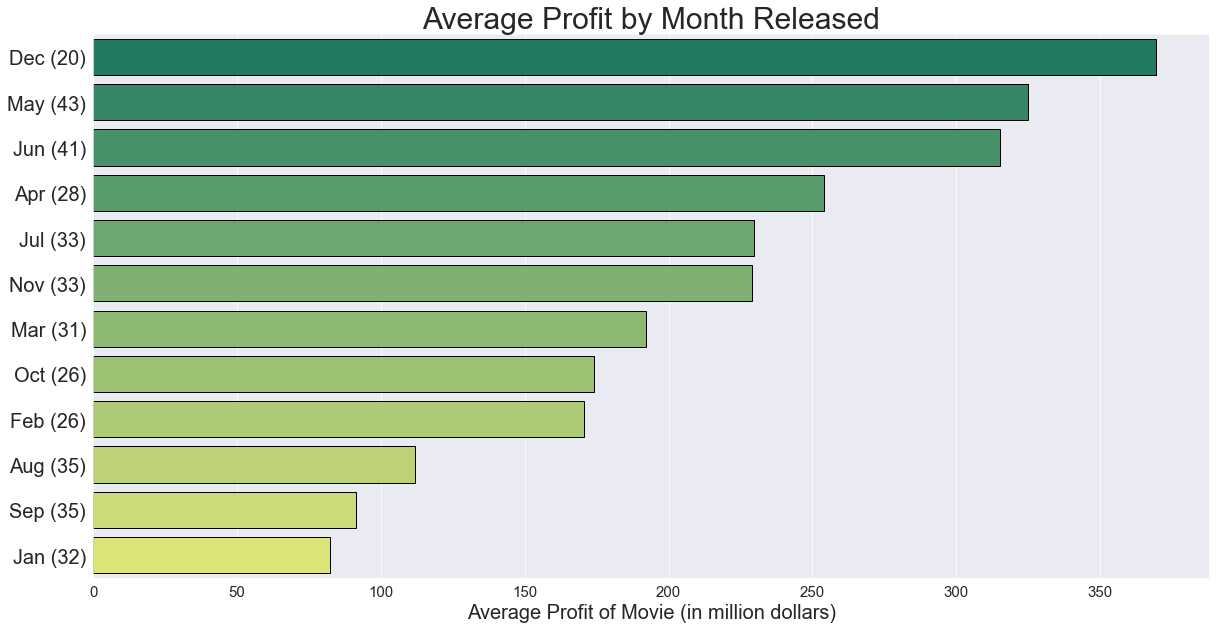

In [175]:
fig, ax = plt.subplots(figsize = (20, 10))
month_profits = sns.barplot(gbm_action["total_profit"]/1000000, gbm_action["labels"], edgecolor ='black', palette ='summer')
month_profits.set_title("Average Profit by Month Released", fontsize = 30);
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20);
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Average Profit of Movie (in million dollars)', fontsize=20);
plt.savefig('./images/month_profit_action.png')